# Accelerating Glacier and Surface Processes Modeling with Machine Learning and New Python Libraries

Billy Armstrong, Appalachian State University, Boone, NC <br>
Ethan Pierce, Dartmouth College, Dartmouth, Hanover, NH <br>
Irina Overeem, University of Colorado, Boulder, CO<br>
Jocelyn Reahl, University of Colorado, Boulder, CO<br>

funding of NSF-OPP award 2334776


### Agenda and Learning Goals

1) discuss recent python libraries to model glacier processes
   
2) introduce the Instructed Glacier Model (IGM), a machine learning-based glacier dynamics emulator

3) hands-on simulation of Gilkey Glacier, Alaska using IGM with boundary conditions automatically retrieved from OGGM
   
4) hands-on simulation of IGM of Meade Glacier, Alaska with specific regional surface mass balance

5) use IGM output within the landlab toolkit to simulate glacial erosion for Mendenhall glacier

6) group discussion on future research questions 


# 2    Introduction to the Instructed Glacier Model

Developer is Prof. Guillaume Jouvet, University of Lausanne. <br>

Code is to be found here:
https://github.com/jouvetg/igm

What is IGM?
<br>
The Instructed Glacier Model (IGM) is an open-source Python package, which simulates 3D glacier evolution accounting for the coupling between ice thermo-dynamics, surface mass balance, and mass conservation. The current IGM is a Physics-Informed Deep learning model.


#### More information on IGM<br>

1) Jouvet, Guillaume; Cordonnier, Guillaume; 2023. Ice-flow model emulator based on physics-informed deep learning. Journal of Glaciology, 1–15. https://doi.org/10.1017/jog.2023.73

2) Concepts and capabilities of the Instructed Glacier Model 
Guillaume Jouvet, Samuel Cook, Guillaume Cordonnier, Brandon Finley, Andreas Henz, Oskar Herrmann, Fabien Maussion, Jürgen Mey, Dirk Scherler, Ethan Welty. https://doi.org/10.31223/X5T99C



# 3   Hands-on example with IGM: Gilkey Glacier, Juneau Icefield, Alaska

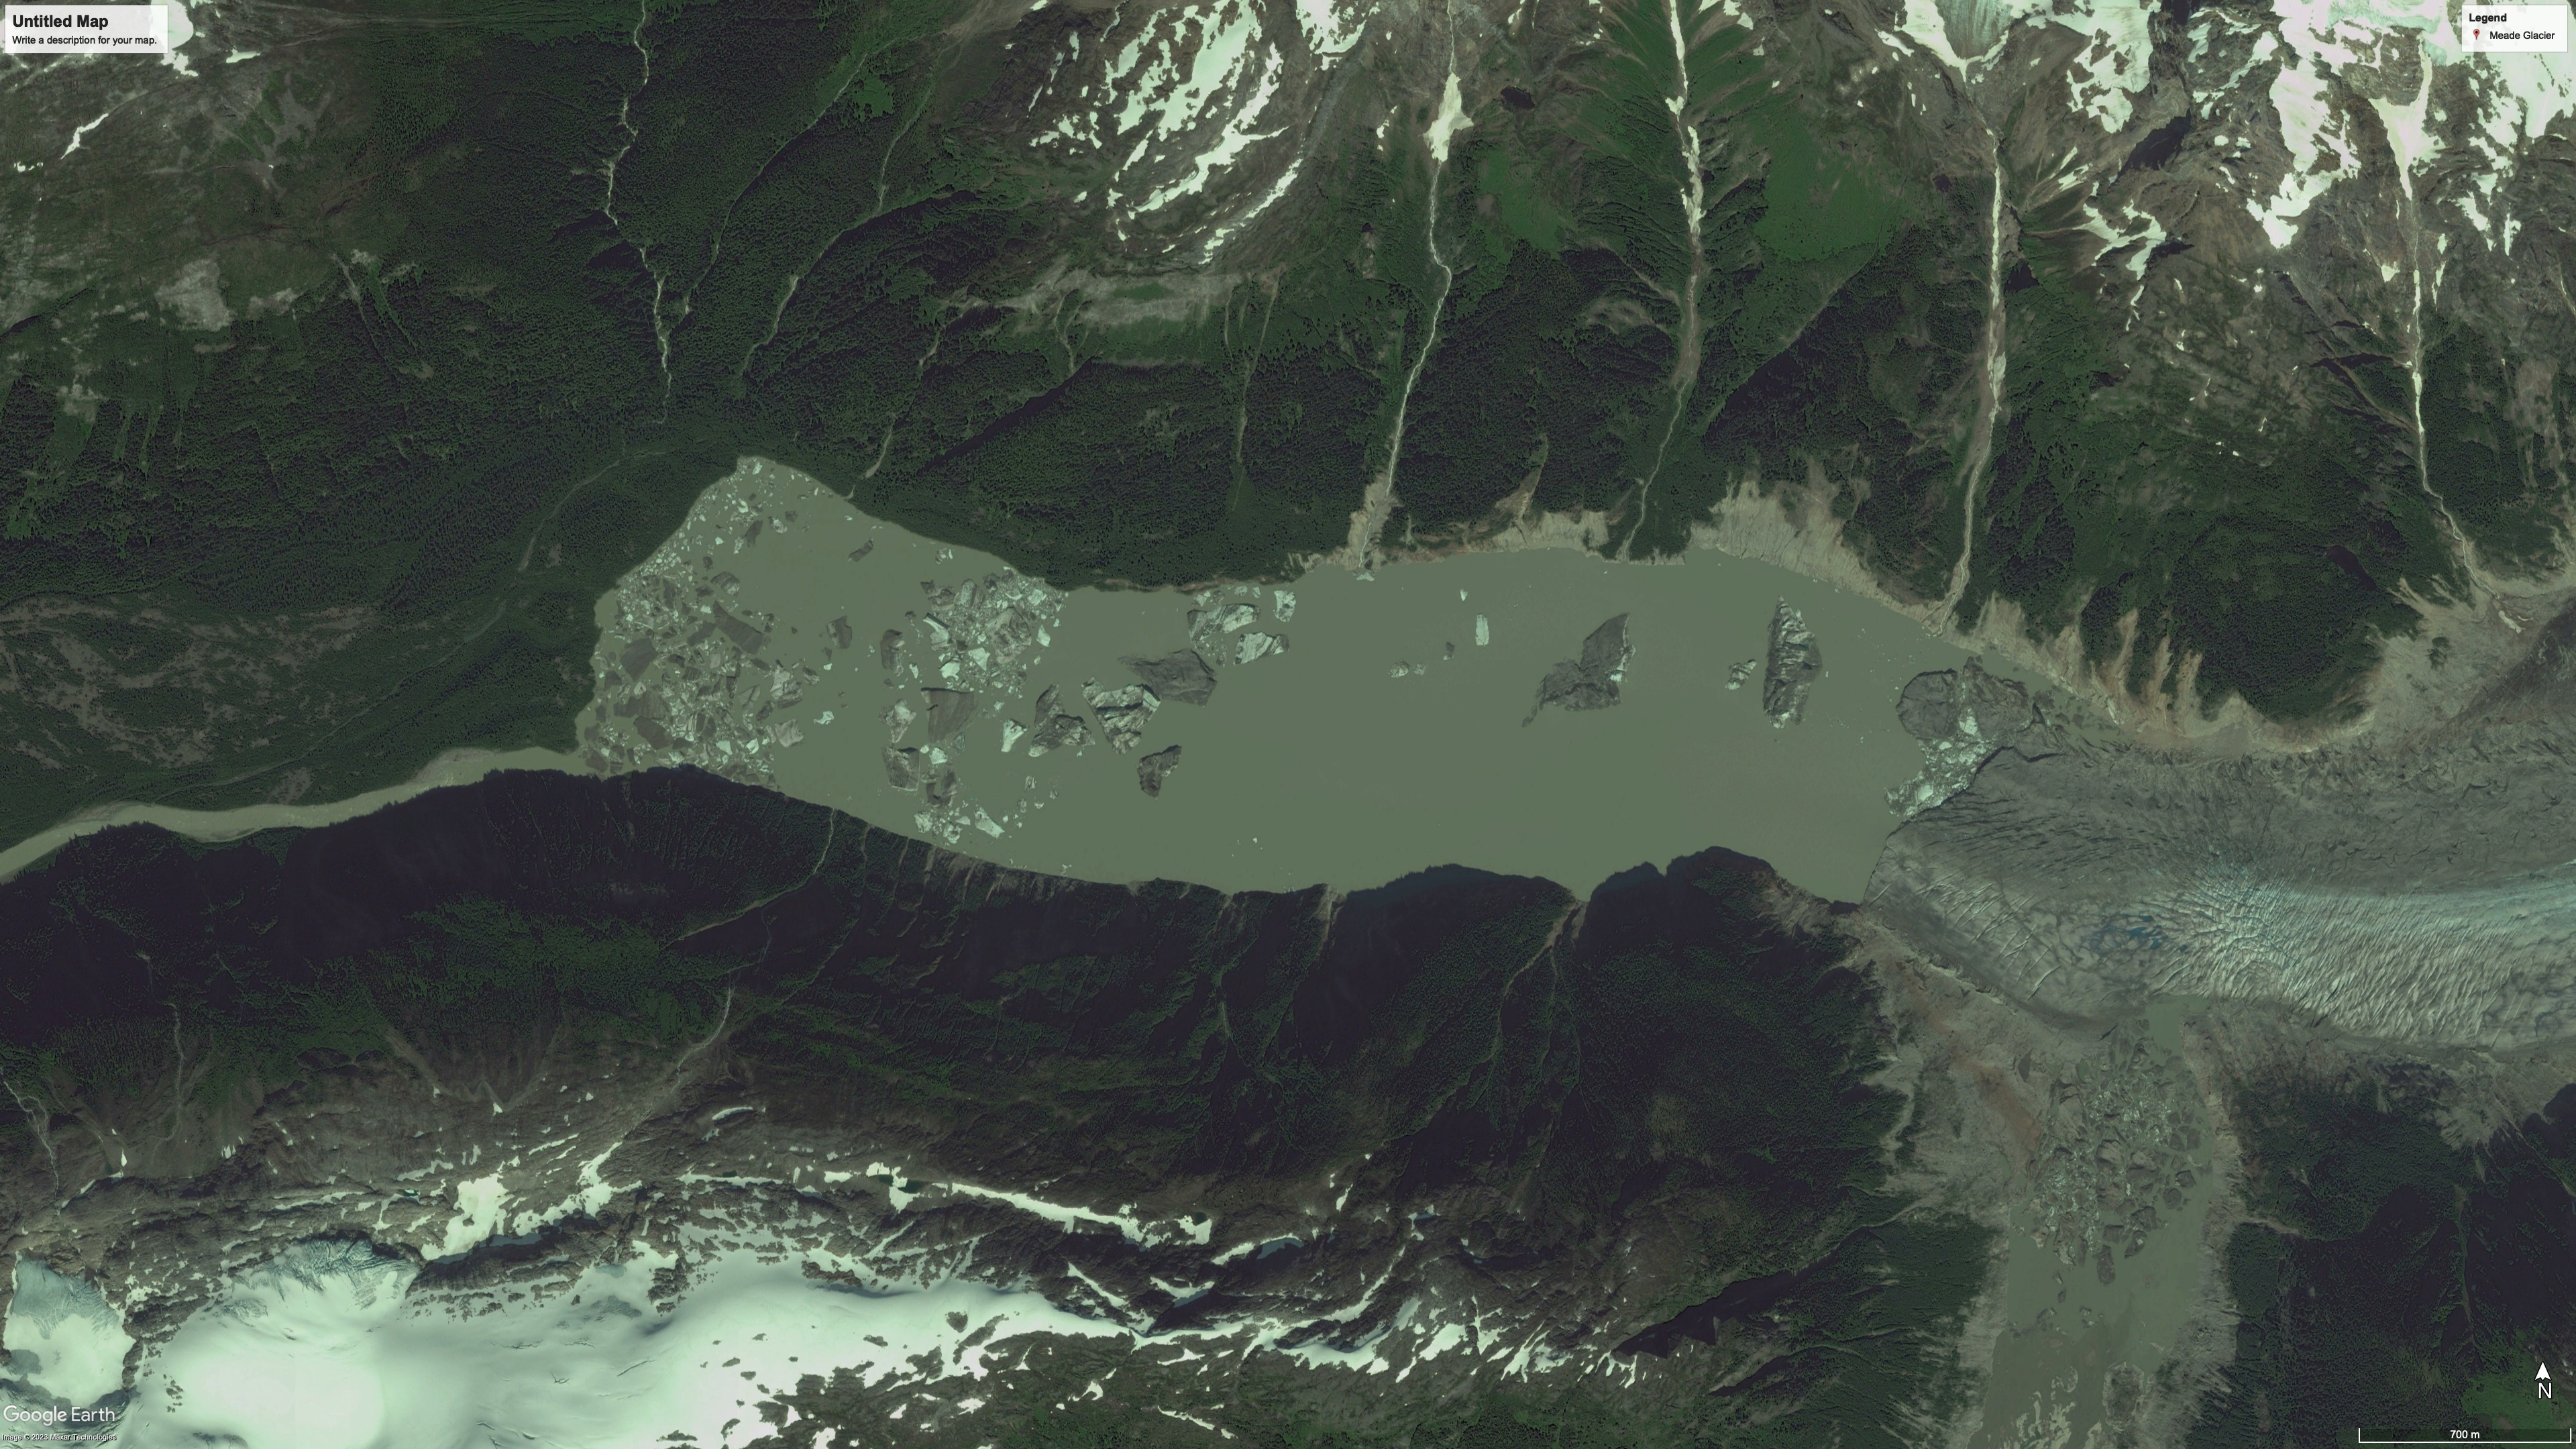

*Gilkey Glacier, Juneau Icefield, Alaska*

#### Basic Example for a Juneau Icefield Glacier outlet

For beginning users, IGM allows you to takes any glacier, and then automatically retrieves input conditions from the Open Glacier Modeling System.
https://oggm.org/

To do so, IGM need the randolph glacier inventory - identification for a specific glacier. 
For future users of this notebook, this global glacier dataset is here: https://www.glims.org/RGI/

Our own projects using IGM are related to projects on glacier outlets from the Juneau Icefield, Alaska. 

For our first example we will run Gilkey glacier, for a second example we will look at Meade glacier.
Then we will show some of the connections of glacier and geomorphic processes for Mendenhall glacier.

RGI_id for Gilkey glacier "RGI60-01.00704"
RGI_id for Meade glacier "RGI60-01.01524 "
RGI_id for Mendenhall glacier "RGI60-01.00704"





#### References
RGI 7.0 Consortium, 2023. Randolph Glacier Inventory - A Dataset of Global Glacier Outlines, Version 7.0. Boulder, Colorado USA. NSIDC: National Snow and Ice Data Center. doi:10.5067/f6jmovy5navz. Online access: https://doi.org/10.5067/f6jmovy5navz

In [11]:
ls

clean.sh                      input_saved.nc         output.nc
computational-pie.png         memory-pie.png         params.json
computational-statistics.txt  memory-statistics.txt  params_saved.json


In [9]:
cd gilkey/smb_oggm

/home/jupyter-irina/GlacierClinic/gilkey/smb_oggm


/opt/tljh/user/envs/igm/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [10]:
ls


params.json


In [6]:
### Let's look at the params.json file


                                                    {
0                   "modules_preproc": ["oggm_shop"],
1                    "modules_process": ["clim_oggm",
2                                         "smb_oggm",
3                                          "iceflow",
4                                             "time",
5                                               "thk"
6                                                  ],
7                  "modules_postproc": ["write_ncdf",
8                                           "plot2d",
9                                       "print_info",
10                                     "print_comp"],
11                    "clim_oggm_clim_trend_array": [
12                          ["time", "delta_temp",...
13                          [ 1900,           0.0,...
14                          [ 2020,           0.0,...
15                          [ 2100,           4.0,...
16                                                 ],
17                   "oggm_R

#### to run the IGM model from terminal

- from the topleft commands in your jupyter notebook, use 'file', 'new terminal'

- in your terminal, type:

> source activate igm <br>
> igm_run <br>
    

In [ ]:
### Input variables

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
inp=xr.open_dataset('input_saved.nc')
inpkeys=list(inp.keys())
for key in inpkeys[2:]:
    inp[key]=xr.where(inp['thk']== 0.0, np.nan,inp[key])
inp['thk']=xr.where(inp['thk']==0.0, np.nan,inp['thk'])
inp


In [ ]:
# Peruse what are some of the input variables


# Plot one of the parameter maps you may be interested in

#for example:
#surftopo=plt.imshow(inp.usurf,origin='lower')
#cbar=plt.colorbar(surftopo)


## Plotting output of your example simulation: Gilkey Glacier, Juneau Icefield, Alaska


In [21]:
# Import standard modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import os

# Import custom igmplotter module as igm
import igmplotter as igm

ModuleNotFoundError: No module named 'igmplotter'

In [22]:
# Define path to output.nc file of choice
path = os.path.join(os.getcwd(), 'gilkey', 'smb_oggm', 'output.nc')

# Initialize IGMPlotter class with path:
ip = igm.IGMPlotter(path)


NameError: name 'igm' is not defined

## The IGMPlotter class, now named as the object `ip`, has a few parameters that we can call:
- `ip.data_orig` : the original `output.nc` file, without masking data by where the ice is.
- `ip.data` : the `output.nc` file, with variables 'thk' and onward masked to only show data where the ice exists (all else are `np.nan`).
- `ip.time` : `np.ndarray` of `np.float64` type representing the year — note that these are NOT of `np.datetime64` type.
- `ip.data_keys` : list of variables in dataset

In [19]:
# Uncomment to see what each parameter calls!
#ip.data_orig
#ip.data
#ip.time
ip.data_keys

NameError: name 'ip' is not defined

## The IGMPlotter class also has a few methods for quick plotting:
- `ip.imshow_timestep` : for a given `str` variable (one of the ones shown in `ip.data_keys`) and a year (as a `float`), plot the variable as a `matplotlib.axes.AxesImage` object.

In [ ]:
fig, ax = plt.subplots()
year = 2005
ip.imshow_timestep('thk', year=year, cmap='Blues_r', ax=ax)
ax.set_xlabel('Eastings [m]')
ax.set_ylabel('Northings [m]')
ax.set_title('Gilkey — %d'%(year))

In [ ]:
# if you'd like to do your own manipulations, you can call the data using the ip object
# and use additional plotting tools from igmplotter
# calculate the difference in ice thickness between 2025 and 2005
thkdiff = ip.data.sel(time=2025).thk - ip.data.sel(time=2005).thk

# Create a custom colorbar that is centered at zero:
cmap = 'RdBu'
cmap = igm.get_shiftedColorMap(thkdiff, orig_cmap=cmap)

# Get the extent from thkdiff to scale the imshow plot
extent = igm.get_extent(thkdiff)

# Plot the original extent as a deep red to show where ice extent was lost
plt.imshow(ip.data.sel(time=2005).thk, vmax=1, cmap='Reds', extent=extent, origin='lower')

# Plot the difference in thickness using our custom colormap
im = plt.imshow(thkdiff, origin='lower', cmap=cmap, extent=extent) # plot the difference between 2025 and 2005
cbar = plt.colorbar(im, label=r'$\Delta$(Ice Thickness) [m ice eq.]') # save colorbar
plt.xlabel('Eastings [m]')
plt.ylabel('Northings [m]')
plt.title('Gilkey 2025–2005')

In [ ]:
# Here's another example where we are plotting the ice surface velocity direction in degrees (0° = North) 
year = 2005
y = ip.data.sel(time=year).vvelsurf.values
x = ip.data.sel(time=year).uvelsurf.values
veldirs = np.full(x.shape, np.nan)
xdir, ydir = [1, 1, -1, -1], [1, -1, -1, 1]
for i in range(4):
    idx = np.where((np.sign(x) == xdir[i]) & (np.sign(y) == ydir[i]))
    veldirs[idx] = np.degrees(np.arctan(np.abs(y[idx]/x[idx]))) + 90*np.arange(0, 4)[i]
extent = igm.get_extent(ip.data)
im = plt.imshow(veldirs, origin='lower', cmap='twilight_shifted', extent=extent)
cbar = plt.colorbar(im, label='Ice Surface Velocity Direction [°]')
plt.title('Gilkey – %d'%(year))
plt.xlabel('Eastings [m]')
plt.ylabel('Northings [m]')

# 4   Hands-on example with IGM with specific regional surface mass balance: Meade Glacier, Juneau Icefield, Alaska


In [ ]:
#### go back to your terminal window


- in your terminal, type:

> cd ..
> cd meade/smb_5yrwindow

> source activate igm <br>
> igm_run <br>

In [ ]:
This directory has a additional file, smb_simple_param.txt

This file specifies ablation and accumulation rates and the ELA (equilibrium line altitude) for specific years. 



## Plotting output of your example simulation: Meade Glacier, Juneau Icefield, Alaska

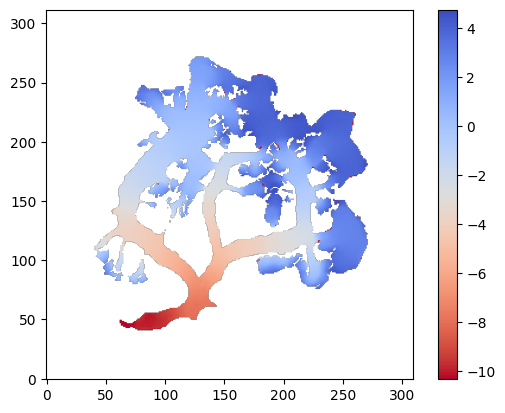

In [18]:
# plot the surface mass balance map for Meade

smbmap=plt.imshow(outp.isel(time=20).smb,origin='lower', cmap='coolwarm_r')
cbar=plt.colorbar(smbmap)

In [ ]:
# plot the depth-averaged flow velocity map for Meade

velmap=plt.imshow(test.isel(time=0).velbar_mag,origin='lower', cmap='jet')
cbar=plt.colorbar(velmap)


In [ ]:
# 5   Hands-on example with IGM with specific regional surface mass balance: Meade Glacier, Juneau Icefield, Alaska

RGI_id for nearby Mendenhall glacier "RGI60-01.00709"